# What do Probability and Statistics Sound like?

##### Import libraries

In [80]:
# These are some handy libraries i used to write this code
# Standard stuff 
import os
import numpy as np
import random
import seaborn as sns
import time
#Visualization library
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import sounddevice as sd
"""
Audio driver library for python:  https://python-sounddevice.readthedocs.io/en/0.3.12/installation.html


can be installed however you like with 'conda install -c conda-forge python-sounddevice' 
    
    or 'python3 -m pip install sounddevice --user'
    
    or however you like to do it
    """


#Python music library
from pippi import dsp, oscs, tune

""" music library for python: https://github.com/luvsound/pippi

can be installed with 'pip install pippi'

or from source """
import warnings
warnings.filterwarnings('ignore')
print('done')

done


## Motivation

The most popular way to generate an intuitive understanding of statistics is through visualization. Indeed if you search google for central limit theorem visualization, you'll find worthwhile contributions. However, a search of google for "central limit theorem audio" or other sound-related terms yields the IRRELEVANT. 

While vision is likely our most acute sense, I wondered what I was missing by solely relying on visualization to develop intuition about statistics. Furthermore, there are people for whom visualizations won't be helpful, such as the blind. I think they also deserve some tools to help them conceptualize the beauty of probability and statistics. While I'm lucky to be able to see and understand visualizations, I found using a different sense to understand probability to be interesting and worthwhile. So lend me your ear for a few minutes; hopefully you'll find the same. 

Functions included here can be used to hear different distributions, hear sampling of distributions, hear convolution of distributions. Use shift+tab to see what each function takes as inputs and it's possible doc string and go to town. Students could use these functions as a base to make other investigations into how probability sounds. 

For example, I made function that generates a song with the number of times a note occurs distributed as a poisson AND the length of each note is also distributed as poisson. It's a real banger!

### Define functions

In [81]:
def hear_normal(mean, std, num_samps):
    dist_samples= np.random.normal(loc=mean, scale=std, size=num_samps)
    out = dsp.buffer()            
    for i in dist_samples:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 1/len(dist_samples))
            out.dub(osc.play(5))
            
    print('playing normal distribution')
    sns.distplot(dist_samples, kde = False)
    sd.play(out)
    #out.write('%s~/normal.wav')
"""def hear_beta(a, b, num_samps):
    dist_samples= np.random.beta(a,b, size=num_samps)
    out = dsp.buffer()            
    for i in dist_samples:
            #time.sleep(1)
            osc = oscs.Osc(freq=(i+1)*440, wavetable=dsp.SINE, amp = 1/len(dist_samples)) #scale probability to be a hearable freq
            out.dub(osc.play(5))
            
    print('playing beta distribution')
    sns.distplot(dist_samples, kde = False)
    sd.play(out)"""
def hear_beta(a, b, num_samps):
    dist_samples= np.random.beta(a,b, size=num_samps)
    out = dsp.buffer()  
    
    for i in dist_samples:
            
            osc = oscs.Osc(freq=(i+1)*440, wavetable=dsp.SINE, amp = 1/len(dist_samples)) #scale probability to be a hearable freq
            out.dub(osc.play(3))
            
    print('playing beta distribution')
    sns.distplot(dist_samples, kde = False)
    sd.play(out)
    
def hear_beta_long(a, b, num_samps):
    dist_samples= np.random.beta(a,b, size=num_samps)
    out = dsp.buffer()            
    for i in dist_samples:
            #time.sleep(1)
            osc = oscs.Osc(freq=(i+1)*440, wavetable=dsp.SINE, amp = 1/len(dist_samples)) #scale probability to be a hearable freq
            out.dub(osc.play(5))  
def hear_exponential(lamb_param, num_samps):
    dist_samples= np.random.exponential(lamb_param, size=num_samps)
    out = dsp.buffer()            
    for i in dist_samples:
            #time.sleep(1)
            #Scale 0 to an audible frequency
            osc = oscs.Osc(freq=(i+440), wavetable=dsp.SINE, amp = 1/len(dist_samples)) #scale probability to be a hearable freq
            out.dub(osc.play(5))
            
    print('playing exponential distribution')
    sns.distplot(dist_samples, kde = False)
    sd.play(out)
    
def hear_poisson(lamb_param, num_samps):
    dist_samples= np.random.poisson(lamb_param, size=num_samps)
    out = dsp.buffer()            
    for i in enumerate(dist_samples):
            #time.sleep(1)
            #Scale 0 to an audible frequency
            osc = oscs.Osc(freq=(i[1]+10)*(i[0]+1), wavetable=dsp.SINE, amp = 1/len(dist_samples)) #scale probability to be a hearable freq
            out.dub(osc.play(5))
            
    print('playing poisson distribution')
    sns.distplot(dist_samples, kde = False)
    sd.play(out)
    
    
def hear_gumbel(loc, scale, num_samps):
    dist_samples= np.random.gumbel(loc, scale, size=num_samps)
    out = dsp.buffer() 
    print(dist_samples)
    for i in dist_samples:
            #time.sleep(1)
            osc = oscs.Osc(freq=(i), wavetable=dsp.SINE, amp = 1/len(dist_samples)) #scale probability to be a hearable freq
            out.dub(osc.play(5))
            
    print('playing the gumbel distribution')
    g = sns.distplot(dist_samples, kde = False)
    
    sd.play(out)
    
def hear_poisson_in_G(num_notes):
    """Plays a 30 note 'song' with tones AND lengths distributed according to poisson"""
    dist_samples= np.random.poisson(2, size= num_notes)
    dist_length = np.random.poisson(2, size = num_notes)
    out = dsp.buffer()
    #list of frequencies in G major
    g_major_freqs = [246.94,196.00 ,220,261.63,293.66,329.63,369.99,392.00]
    
    sns.distplot(dist_samples, kde = False)
    for i in dist_samples:
            running_buffer = dsp.buffer()
            time.sleep((dist_length[i]+1)/8)
            running_osc = oscs.Osc(freq=g_major_freqs[i], wavetable=dsp.SAW, amp = 1/len(dist_samples)) 
            running_buffer.dub(running_osc.play((dist_length[i]+1)/8))
                               
            print('Playing:', i)
            sd.play(running_buffer)
            #Scale 0 to an audible frequency
    

In [82]:
def listen_to_samples(mean, std, num_samps):
    dist_samples= np.random.normal(loc=mean, scale=std, size=num_samps)
    out_mean = dsp.buffer()
    osc_mean = oscs.Osc(freq=np.mean(dist_samples), wavetable=dsp.SINE, amp = 0.5)
    length = 1
    out_mean.dub(osc_mean.play(length))
    out = dsp.buffer()
    
    #loop thru 10 points in the dist for illustrative purposes
    for i in dist_samples[:10]:
                # Play the sampled frequency 
                running_buffer = dsp.buffer()
                time.sleep(1*length)
                running_osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 0.5)
                running_buffer.dub(running_osc.play(length))
                print('Playing the sampled frequency:', i)
                sd.play(running_buffer)
                #play the sonic distribution that arises from the frequencies 
                time.sleep(1 * length)
                osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp =1/10) # may be able to change this so the amplitudes are added in a smarter way
                #Add the new frequency to the buffer
                out.dub(osc.play(length))
                print("playing the sound distribution with newly added frequency")
                sd.play(out)
                time.sleep(1)

                #can uncomment to get the reference frequency which is the mean of the dist
                #time.sleep (1*length)
                #print("playing the mean frequency of the total sound distribution")
                #sd.play(out_mean)
def hear_beta_update(a1, b1, num_updates):
    #prior beta 
    hear_beta_long(a1,b1,200)
    time.sleep(8)
    #dist_samples= np.random.beta(a,b, size=num_samps)
    for i in range(num_updates):
        hear_beta(1,((i+1)*2)**2, 200)
        print('updating beta distribution', 'a = 1, b =', ((i+2)*2)**2)
        time.sleep(2)
    
    # final beta
    #sns.distplot(dist_samples, kde = False)

In [83]:
def IID_sum_uni(a,b, mean, num_samps):
    """Generates samples using a uniform distibution specifiedby a,b. 
    The mean of the resulting normal is chosen by the mean parameter, 
    and the number of samples is chosen by the number of samples. 
    Very similar to code written in a problem set except I have transposed the uniform to be an audible frequency"""
    
    IID_sum = []
    for i in range(num_samps):

        uniform_sum = 0 # set uniform_sum to 0
        expectation_of_uni = (a+b)/2
        var_of_uni = (b-a)**2/12
        rounded_mean = np.round(mean)
        iterations = int(rounded_mean/expectation_of_uni)
        #print('rounded mean:', rounded_mean)
        for j in range(iterations): #number of times to sum... n in central limit theorem
        # E[X] (the uniform) is 1. Adding these together 440 times gives 440 a very hearable tone
            uniform_sum += random.uniform(a,b)
        IID_sum.append(uniform_sum)
    rounded_sum = np.round(IID_sum, decimals=2)
    print(np.mean(rounded_sum), 'mean of the distrubtion of added IID random uniforms')
    print(np.var(rounded_sum), 'var of the distrubtion of added IID random uniforms')
    if num_samps > 15:
        n_bins = num_samps/10
    #else: 
     #   n_bins = num_samps
    #View the frequency distribution
    sns.distplot(rounded_sum, kde=False, rug=False, bins = int(n_bins))
    print("The normal distribution derived from the Central Limit Theorem would have: mean", expectation_of_uni*iterations)
    print("The normal distribution derived from the Central Limit Theorem would have: mean", var_of_uni*iterations)
    return rounded_sum, expectation_of_uni*iterations, var_of_uni*iterations

In [84]:
def multimodal_dist(mean1, mean2, std1, std2, num_samps):
    """ Plays two different normal distributions specified by the user"""
    dist_samples1= np.random.normal(loc=mean1, scale=std1, size=num_samps)
    out1 = dsp.buffer()  
    out = dsp.buffer()
    for i in dist_samples1:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 0.5/num_samps)
            out1.dub(osc.play(6))
            out.dub(osc.play(6))
    dist_samples2= np.random.normal(loc=mean2, scale=std2, size=num_samps)
    out2 = dsp.buffer()            
    for i in dist_samples2:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 0.5/num_samps)
            out2.dub(osc.play(6))
            out.dub(osc.play(6))
            
    
    dist_samples_all = np.append(dist_samples1, dist_samples2)
    g = sns.distplot(dist_samples1, kde = False)
    g1 = sns.distplot(dist_samples2, kde = False)
    g2 =sns.distplot(dist_samples_all, kde = False, bins = int(num_samps))
    
    print('play dist1')
    sd.play(out1)
    time.sleep(5)
    print('play dist2')
    sd.play(out2)
    time.sleep(5)
    print('play the multimodal')
    sd.play(out)
    

In [85]:
def play_clt(a,b,mean,num_samps): 
    
    IID_output = IID_sum_uni(a,b,mean,num_samps)
    rounded_sum = IID_output[0]
    clt_mean = IID_output[1]
    clt_var = IID_output[2]
    sd.default.samplerate = 44100
    out_mean= dsp.buffer()
    out_440 = dsp.buffer()
    osc_mean = oscs.Osc(freq=np.mean(rounded_sum), wavetable=dsp.SINE, amp = 0.5)
    length = 1
    out_mean.dub(osc_mean.play(length))
    out = dsp.buffer()
    out_clt = dsp.buffer()

    #loop thru 10 points in the dist for illustrative purposes
    print('Playing 10 representative samples from the distribution we created')
    for i in rounded_sum[:4]:
                # Play the sampled frequency 
                running_buffer = dsp.buffer()
                time.sleep(1*length)
                running_osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 0.5)
                running_buffer.dub(running_osc.play(length))
                print('Playing the sampled frequency:', i)
                sd.play(running_buffer)
                #play the sonic distribution that arises from the frequencies 
                time.sleep(1 * length)
                osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp =1/10) # may be able to change this so the amplitudes are added in a smarter way
                #Add the new frequency to the buffer
                out.dub(osc.play(length))
                print("playing the sound distribution with newly added frequency")
                sd.play(out)


                #can uncomment to get the reference frequency which is the mean of the dist
                #time.sleep (1*length)
                #print("playing the mean frequency of the total sound distribution")
                #sd.play(out_mean)
    time.sleep(0.5)
    #clear buffer and fill it with every frequency in the list
    out = dsp.buffer()            
    for i in rounded_sum:
                #time.sleep(1)
                osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 1/len(rounded_sum))
                out.dub(osc.play(length*5))


    
    #
    #Playing total sum of distribution
    print('play IID "normal"')
    sd.play(out)
    time.sleep(5)
    print(clt_var)
    print(clt_mean)
    print(num_samps)
    hear_normal(clt_mean, np.sqrt(clt_var), num_samps)
            
    
    sns.distplot(rounded_sum, kde = False, color = 'purple')



In [86]:
def play_convolve_dist(mean1, mean2, std1, std2, num_samps):
    dist_samples1= np.random.normal(loc=mean1, scale=std1, size=num_samps)
    dist_samples2= np.random.normal(loc=mean2, scale=std2, size=num_samps)
    
    # convolved distribution
    conv_dist = np.random.normal(loc = mean1 + mean2, scale = std1*std2, size = num_samps)
    
    #create an out buffer for the audio
    out = dsp.buffer()
    out1 = dsp.buffer()
    out2 = dsp.buffer()
    out3 = dsp.buffer()
    
    #try just adding the two distrubtions to see what that sounds like, i.e. dist1[0] + dist2[0]
    conv_adde2e = dist_samples1 + dist_samples2  #convolve by adding each sample to each sample
    print(conv_adde2e)
    #Dist1 audio generation
    for i in dist_samples1:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 0.5/num_samps)
            out1.dub(osc.play(5))
            #out.dub(osc.play(5))
    dist_samples2= np.random.normal(loc=mean2, scale=std2, size=num_samps)
    out2 = dsp.buffer()            
    
    #Dist2 audio generation
    for i in dist_samples2:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 0.5/num_samps)
            out2.dub(osc.play(5))
            #out.dub(osc.play(5))
     
    #Convolved dist audio generation
    for i in conv_dist:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 0.5/num_samps)
            out.dub(osc.play(5))
            #out.dub(osc.play(5))
    
    """for i in conv_adde2e:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SINE, amp = 0.5/num_samps)
            out3.dub(osc.play(5))
            #out.dub(osc.play(5))"""
    
    sns.distplot(dist_samples1, kde = False, color ='blue' )
    sns.distplot(dist_samples2, kde = False, color = 'red')
    sns.distplot(conv_dist, kde = False, color = 'purple')
    #sns.distplot(conv_adde2e)
    print('play the dist 1 of all the sine waves')
    sd.play(out1)
    time.sleep(5)
    print('play the dist 2 of all the sine waves')
    sd.play(out2)
    time.sleep(5)
    #play convolved dist
    print('play the convolved dist of all the sine waves')
    sd.play(out)
    time.sleep(5)
    #print('play the sum of samples')
    #sd.play(out3)

In [87]:
def play_convolve_dist_saw(mean1, mean2, std1, std2, num_samps):
    dist_samples1= np.random.normal(loc=mean1, scale=std1, size=num_samps)
    dist_samples2= np.random.normal(loc=mean2, scale=std2, size=num_samps)
    
    # convolved distribution
    conv_dist = np.random.normal(loc = mean1 + mean2, scale = std1*std2, size = num_samps)
    
    #create an out buffer for the audio
    out = dsp.buffer()
    out1 = dsp.buffer()
    out2 = dsp.buffer()
    out3 = dsp.buffer()
    
    #try just adding the two distrubtions to see what that sounds like, i.e. dist1[0] + dist2[0]
    conv_adde2e = dist_samples1 + dist_samples2  #convolve by adding each sample to each sample
    print(conv_adde2e)
    #Dist1 audio generation
    for i in dist_samples1:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SAW, amp = 0.5/num_samps)
            out1.dub(osc.play(length*5))
            #out.dub(osc.play(length*5))
    dist_samples2= np.random.normal(loc=mean2, scale=std2, size=num_samps)
    out2 = dsp.buffer()            
    
    #Dist2 audio generation
    for i in dist_samples2:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SAW, amp = 0.5/num_samps)
            out2.dub(osc.play(length*5))
            #out.dub(osc.play(length*5))
     
    #Convolved dist audio generation
    for i in conv_dist:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SAW, amp = 0.5/num_samps)
            out.dub(osc.play(length*5))
            #out.dub(osc.play(length*5))
    
    for i in conv_adde2e:
            #time.sleep(1)
            osc = oscs.Osc(freq=i, wavetable=dsp.SAW, amp = 0.5/num_samps)
            out3.dub(osc.play(length*5))
            #out.dub(osc.play(length*5))
    
    sns.distplot(dist_samples1, kde = False)
    sns.distplot(dist_samples2, kde = False)
    sns.distplot(conv_dist, kde = False)
    sns.distplot(conv_adde2e)
    print('play the dist 1 of all the sine waves')
    sd.play(out1)
    time.sleep(5)
    print('play the dist 2 of all the sine waves')
    sd.play(out2)
    time.sleep(5)
    #play convolved dist
    print('play the convolved dist of all the sine waves')
    sd.play(out)
    time.sleep(5)
    print('play the sum of samples')
    sd.play(out3)

In [88]:
def hear_poisson_dist_in_series(lamb_param,num_notes, sqrt):
    """Plays a sampling of the poission distribution where the number of counts of a particular value is proportional to amount of time the note is played"""
    dist_samples= np.random.poisson(lamb_param, size= num_notes)
    #dist_length = np.random.poisson(lamb_param, size = num_notes)
    amplitudes = list(np.histogram(dist_samples, bins = len(np.unique(dist_samples)))[0])
    out = dsp.buffer()
    #list of frequencies in G major
    g_major_freqs = [196.00,220,246.94,261.63,293.66,329.63,369.99,392.00, 440, 493.88, 523.55,587.33,659.25, 698.46, 740, 784]
    dist_samples = np.sort(dist_samples)
    sns.distplot(dist_samples, kde = False)
    if sqrt == True:
        for i in enumerate(list(np.histogram(dist_samples, bins = len(np.unique(dist_samples)))[0])):
            running_buffer = dsp.buffer()

            running_osc = oscs.Osc(freq=g_major_freqs[i[0]], wavetable=dsp.SQUARE, amp = 1) 
            running_buffer.dub(running_osc.play((0.3 * np.sqrt(i[1]/100))))

            print('Playing:', i)
            sd.play(running_buffer)
            time.sleep((0.3 * np.sqrt(i[1]/100))) 
                #Scale 0 to an audible frequency
    else:
        for i in enumerate(list(np.histogram(dist_samples, bins = len(np.unique(dist_samples)))[0])):
            running_buffer = dsp.buffer()

            running_osc = oscs.Osc(freq=g_major_freqs[i[0]], wavetable=dsp.SQUARE, amp = 1) 
            running_buffer.dub(running_osc.play((0.3 * i[1]/100)))

            print('Playing:', i)
            sd.play(running_buffer)
            time.sleep((0.3 * i[1]/100)) 
                #Scale 0 to an audible frequency

## Listen to the CLT 

This function works by by summing IID random uniforms generating an audio of this. Then by using Scipy to sample the normal distribution that this approximates and generate audio of this distribution. Each sample is transformed into a frequency represented aurally by a sine wave. By recording each of these sine waves into a buffer we can hear what the distribution sounds like.

438.872 mean of the distrubtion of added IID random uniforms
48.88089599999997 var of the distrubtion of added IID random uniforms
The normal distribution derived from the Central Limit Theorem would have: mean 440.0
The normal distribution derived from the Central Limit Theorem would have: mean 73.33333333333333
Playing 10 representative samples from the distribution we created
Playing the sampled frequency: 431.67
playing the sound distribution with newly added frequency
Playing the sampled frequency: 434.05
playing the sound distribution with newly added frequency
Playing the sampled frequency: 433.79
playing the sound distribution with newly added frequency
Playing the sampled frequency: 449.87
playing the sound distribution with newly added frequency
play IID "normal"
73.33333333333333
440.0
20
playing normal distribution


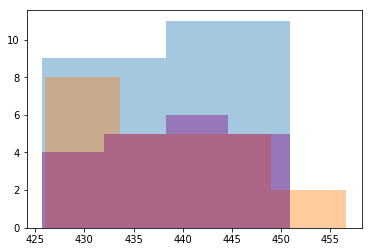

In [89]:
play_clt(0, 1, 440, 20)

The difference in means and variance is almost imperceptible unless they are played together at the same time. 

## Listen to different types of distributions

### Beta

playing beta distribution


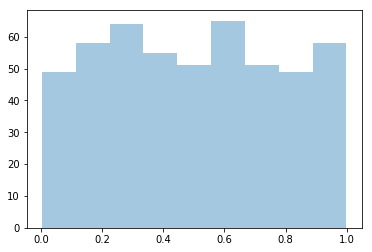

In [107]:
hear_beta(1,1,500)

playing beta distribution
updating beta distribution a = 1, b = 16
playing beta distribution
updating beta distribution a = 1, b = 36
playing beta distribution
updating beta distribution a = 1, b = 64
playing beta distribution
updating beta distribution a = 1, b = 100
playing beta distribution
updating beta distribution a = 1, b = 144
playing beta distribution
updating beta distribution a = 1, b = 196
playing beta distribution
updating beta distribution a = 1, b = 256
playing beta distribution
updating beta distribution a = 1, b = 324
playing beta distribution
updating beta distribution a = 1, b = 400
playing beta distribution
updating beta distribution a = 1, b = 484


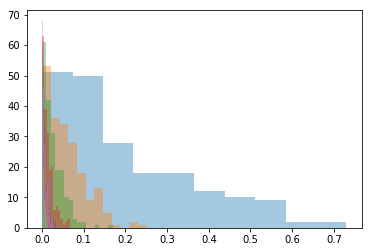

In [109]:
hear_beta_update(1,1, num_updates=10)

A weak prior belief sounds like what I like to call the cloud of confusion. Strong priors are perceived as one tone suggesting the higher level of certainty around your prior. 

### The discrete distributions are quite interesting.

playing poisson distribution


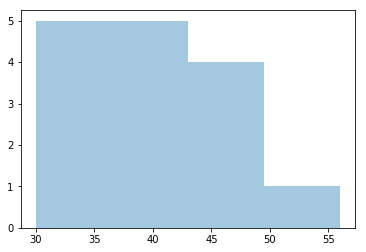

In [111]:
hear_poisson(40,15)

playing exponential distribution


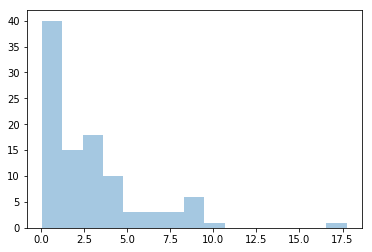

In [93]:
hear_exponential(3,100)

#### Gumbel doesn't sound so great 

[480.97352735 413.30247662 437.74291367 455.52132944 453.52394435
 424.72465055 455.89900502 466.91331185 464.69891174 476.52758835
 442.66170484 491.97021445 451.87814702 441.76341528 449.9192583
 436.47271035 476.4886183  430.40811025 468.36810021 428.87370394
 442.08693311 456.48457626 430.05190511 468.30344907 432.54572356
 422.40024242 440.15884817 498.39031115 457.61266666 461.46799091
 443.32043267 455.34712132 457.10276721 422.88977855 567.11529256
 486.42115683 419.26607745 419.06127311 427.26006836 430.49967485
 491.64482509 446.23385785 472.55031289 449.7875953  453.09853132
 435.70091843 441.87150334 508.34726761 434.58151806 423.79794047
 437.45951935 439.40651618 429.65781309 425.16679034 448.85005504
 443.25871306 418.23095474 472.64436667 457.66965404 489.57630029
 455.07710045 444.51153103 483.18803655 416.66482073 469.25457834
 419.45338474 460.072581   498.4113773  450.56062632 414.2188371
 443.03560992 439.45702643 484.98526358 477.04159622 410.96809275
 421.1342448

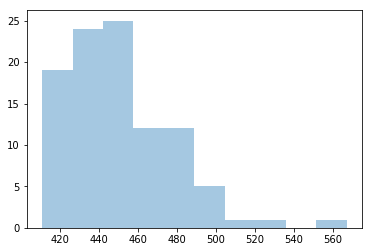

In [94]:
hear_gumbel(440, 20, 100)

### The ear hears lower variance as being louder, even though the actual amount of sound is similar. 

Try playing with the variance of "hear_normal". You'll note two things. 
1. If the variance is low, the frequency played condenses on what seems like 1 tone to you. Although from the graph we can see the frequencies are still normally distributed. 
2. It seems that a higher variance will produce a sound that isn't as loud, is this true or is it a quirk of your perception? Turns out a very similar amount of actual sonic energy is hitting your ears, in the case of high variance and low variance (barring phase cancellation issues, which are real and audible).

playing normal distribution


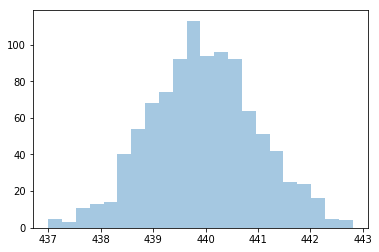

In [95]:
hear_normal(440, 1, 1000)

### You can use this function to listen to a distribution being built up by sound. 

In [96]:
listen_to_samples(440, 200, 100)

Playing the sampled frequency: 375.75144813307685
playing the sound distribution with newly added frequency
Playing the sampled frequency: 421.46078102486155
playing the sound distribution with newly added frequency
Playing the sampled frequency: 843.5196926761434
playing the sound distribution with newly added frequency
Playing the sampled frequency: 385.8258879695218
playing the sound distribution with newly added frequency
Playing the sampled frequency: 402.75208886256553
playing the sound distribution with newly added frequency
Playing the sampled frequency: 527.3051473972247
playing the sound distribution with newly added frequency
Playing the sampled frequency: 456.37144875719827
playing the sound distribution with newly added frequency
Playing the sampled frequency: 382.8897572634747
playing the sound distribution with newly added frequency
Playing the sampled frequency: 313.07602621452065
playing the sound distribution with newly added frequency
Playing the sampled frequency: 3

## Multiple modes = Beat Frequencies

Musicians are likely familiar with beat frequencies with occur when they are tuning and frequencies close but not identical resulting in a "beating" sound. You can try it by making two normal distributions with similar mean frequencies and low variances.  

play dist1
play dist2
play the multimodal


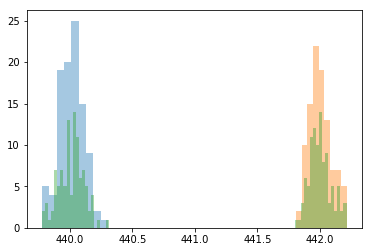

In [97]:
multimodal_dist(440, 442, 0.1, 0.1, num_samps=100)

## Convolution of two normals sounds interesting. You can hear how mean and variance of the distributions are mathematically different in the convolution. 

[ -240.85193521  1097.13945162   766.28970191  1707.88251831
  -139.85891934  -703.49798148   668.65585584  1547.59703196
  -124.94616416    93.09246799  -141.9669226   -536.29600693
   656.12159929   693.26131529  1203.22200654   155.08831838
  1770.96250631    35.32644579  1915.12304351  -496.79214571
  2475.96772326  -698.27068635  1420.46459409   728.98917002
  1376.95920924  2267.57017611   828.94857118  1609.16344417
  1966.27356579   252.19172086  2243.43330147   163.82977579
  1909.91564062  -520.73261977   -41.13198498   453.1891172
  1179.15546347  1666.5709418  -1157.34309669   818.24890453
  -901.03416867  -513.58281865   900.96201892 -1110.2775491
   625.64936179  -364.96095332  -788.00968262  1693.76580913
  1498.53352414   898.46259084  2298.22184148   448.67189578
  1079.17028981   719.4673436     74.31244956  1271.75948664
  -634.08234992 -1640.60826616  -850.15338441   348.08887252
  2429.1059672   -197.39345092  -449.23503579  1514.01148883
  -743.57470583  -120.9322

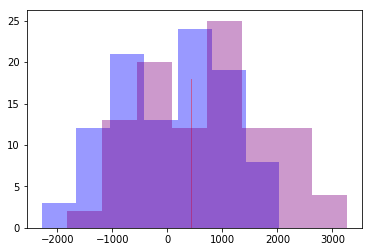

In [98]:
play_convolve_dist(440/2, 440, 1000, 1, 100)

Here we can hear the effect of convolving a distribution with high variance with a distribution with low variance. The mean frequency of the low variance distribution is essentially washed out by the high variance. You can't pick it out of the convolved distribution even though it was once very clearly 1 note.  

[657.40441951 661.79395644 658.54177355 660.16296765 662.04646398
 660.90656019 660.63187319 658.15204624 661.3392707  659.51950268
 658.64751897 661.03470575 660.99609754 660.51512913 658.55597414
 658.40499538 661.92084258 661.23934814 658.81617404 661.50107625
 660.28187722 662.01830038 658.74996245 660.2676437  659.9370187
 658.24676783 663.14384594 657.9931564  660.86663101 659.73845942
 658.82101133 659.73621983 659.51220862 658.01733271 658.66451656
 660.73651134 660.80456031 656.18823912 661.77057904 661.23484889
 659.26972095 656.552951   659.82215297 657.96391535 657.16115173
 658.87161474 659.5016648  659.39640616 660.50226556 659.66404684
 659.73933421 661.80342081 662.29889311 660.10379819 657.84265524
 657.84589481 659.23272594 660.22797142 660.89969835 659.94938281
 663.12409137 662.91937086 660.55354868 660.59531366 657.58336744
 662.54284475 663.15356276 660.84227243 656.75989883 659.06396814
 660.52451128 658.64643499 657.96628311 659.79009128 659.62630158
 661.469830

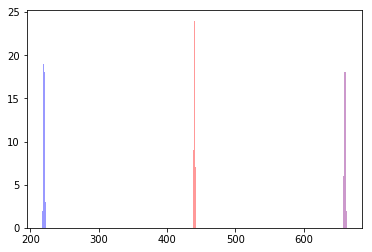

In [99]:
play_convolve_dist(440/2, 440, 1, 1, 100)

Meanwhile if the variances are low, then the dominant effect is adding the means, which simply results in us hearing a higher mean.

We can also use different wave forms if you're interested

## Convergence of Expectation on a frequency as n goes to infinity

In [102]:
def play_convergence_expectation():# 1000 simulations of die roll
    """This function uses the classic dye roll example to show how """
    n = 30000
    length = 0.05
    # In each simulation, there is one trial more than the previous simulation
    avg = []
    for i in range(1,20):
        a = np.random.randint(1,7,i)
        
        avg.append(np.average(a))
        running_buffer = dsp.buffer()
        time.sleep(1.1*length)
        running_osc = oscs.Osc(freq=np.average(a)*100, wavetable=dsp.SINE, amp = 0.5)
        running_buffer.dub(running_osc.play(length))
        print('Playing the sampled frequency:', np.average(a) * 100)
        sd.play(running_buffer)
    print("switch to increments of 15 samples")
    for i in range(500,1000,15):
        print('Playing the sampled frequency:', np.average(a)*100)
        a = np.random.randint(1,7,i)
        avg.append(np.average(a))
        running_buffer = dsp.buffer()
        time.sleep(1.1*length)
        running_osc = oscs.Osc(freq=np.average(a)*100, wavetable=dsp.SINE, amp = 0.5)
        running_buffer.dub(running_osc.play(length))
        print('Playing the sampled frequency:', np.average(a) * 100)
        sd.play(running_buffer) 
    print("switch to increments of 500")
    for i in range(100,n,500):
        print('Playing the sampled frequency:', np.average(a)*100)
        a = np.random.randint(1,7,i)
        avg.append(np.average(a))
        running_buffer = dsp.buffer()
        time.sleep(1.1*length)
        running_osc = oscs.Osc(freq=np.average(a)*100, wavetable=dsp.SINE, amp = 0.5)
        running_buffer.dub(running_osc.play(length))
        print('Playing the sampled frequency:', np.average(a) * 100)
        sd.play(running_buffer)  
    out_final = dsp.buffer()
    out_final.dub(running_osc.play(length*5))
    sd.play(out_final)
    # sample 10 expected value of die rolls
    #avg[10:1000]

In [103]:
play_convergence_expectation()

Playing the sampled frequency: 400.0
Playing the sampled frequency: 150.0
Playing the sampled frequency: 400.0
Playing the sampled frequency: 350.0
Playing the sampled frequency: 340.0
Playing the sampled frequency: 433.3333333333333
Playing the sampled frequency: 400.0
Playing the sampled frequency: 287.5
Playing the sampled frequency: 311.11111111111114
Playing the sampled frequency: 350.0
Playing the sampled frequency: 354.54545454545456
Playing the sampled frequency: 391.66666666666663
Playing the sampled frequency: 369.2307692307692
Playing the sampled frequency: 314.2857142857143
Playing the sampled frequency: 413.33333333333337
Playing the sampled frequency: 418.75
Playing the sampled frequency: 329.4117647058823
Playing the sampled frequency: 305.55555555555554
Playing the sampled frequency: 336.84210526315786
switch to increments of 15 samples
Playing the sampled frequency: 336.84210526315786
Playing the sampled frequency: 347.8
Playing the sampled frequency: 347.8
Playing the

Playing the sampled frequency: 348.5533980582524
Playing the sampled frequency: 350.07582938388623
Playing the sampled frequency: 350.07582938388623
Playing the sampled frequency: 350.80555555555554
Playing the sampled frequency: 350.80555555555554
Playing the sampled frequency: 349.13574660633486
Playing the sampled frequency: 349.13574660633486
Playing the sampled frequency: 348.1061946902655
Playing the sampled frequency: 348.1061946902655
Playing the sampled frequency: 348.45021645021643
Playing the sampled frequency: 348.45021645021643
Playing the sampled frequency: 349.29661016949154
Playing the sampled frequency: 349.29661016949154
Playing the sampled frequency: 351.43568464730293
Playing the sampled frequency: 351.43568464730293
Playing the sampled frequency: 349.4186991869919
Playing the sampled frequency: 349.4186991869919
Playing the sampled frequency: 349.2350597609562
Playing the sampled frequency: 349.2350597609562
Playing the sampled frequency: 349.48828125
Playing the s

# It's that hot new hit all the kids love these days "Ur Love is Poisson"

Turn out this song is different everytime because probability! 

Playing: 3
Playing: 2
Playing: 1
Playing: 2
Playing: 0
Playing: 1
Playing: 1
Playing: 1
Playing: 4
Playing: 2
Playing: 2
Playing: 1
Playing: 2
Playing: 3
Playing: 3
Playing: 0
Playing: 1
Playing: 2
Playing: 4
Playing: 3
Playing: 0
Playing: 3
Playing: 1
Playing: 1
Playing: 5
Playing: 3
Playing: 3
Playing: 2
Playing: 1
Playing: 0


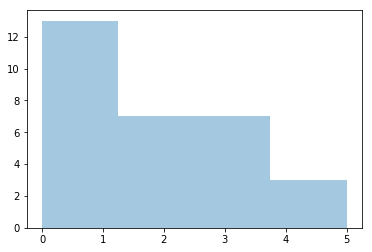

In [112]:
hear_poisson_in_G(30)

Playing: (0, 2)
Playing: (1, 25)
Playing: (2, 43)
Playing: (3, 91)
Playing: (4, 82)
Playing: (5, 85)
Playing: (6, 59)
Playing: (7, 48)
Playing: (8, 30)
Playing: (9, 19)
Playing: (10, 7)
Playing: (11, 5)
Playing: (12, 3)
Playing: (13, 1)


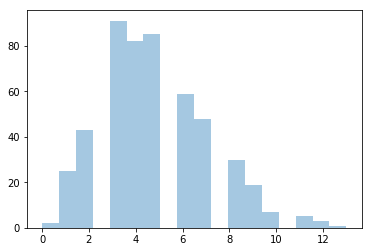

In [110]:
hear_poisson_dist_in_series(5, 500, True)